# Indian Sign Language Classification

## Importing Standard Packages and Libraries

In [1]:
#GENERAL
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
#PATH PROCESS
import os
import os.path
from pathlib import Path
import glob
#IMAGE PROCESS
from PIL import Image
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from keras.applications.vgg16 import preprocess_input, decode_predictions
from keras.preprocessing import image
import skimage
from scipy.ndimage.filters import convolve
from skimage import data, io, filters
#SCALER & TRANSFORMATION
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from keras import regularizers
from sklearn.preprocessing import LabelEncoder
#ACCURACY CONTROL
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
#OPTIMIZER
from tensorflow.keras.optimizers import RMSprop,Adam,Optimizer,Optimizer, SGD
#MODEL LAYERS
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization,MaxPooling2D,BatchNormalization,\
                        Permute, TimeDistributed, Bidirectional,GRU, SimpleRNN, LSTM, GlobalAveragePooling2D, SeparableConv2D, ZeroPadding2D, Convolution2D, ZeroPadding2D
from keras import models
from keras import layers
import tensorflow as tf
from tensorflow.keras.applications import VGG16,VGG19,inception_v3
from keras import backend as K
from tensorflow.keras.utils import plot_model
from keras.models import load_model
from keras.regularizers import l1,l2,L1L2
from tensorflow.keras import regularizers
#SKLEARN CLASSIFIER
from xgboost import XGBClassifier, XGBRegressor
from lightgbm import LGBMClassifier, LGBMRegressor
from catboost import CatBoostClassifier, CatBoostRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV
#IGNORING WARNINGS
from warnings import filterwarnings
filterwarnings("ignore",category=DeprecationWarning)
filterwarnings("ignore", category=FutureWarning) 
filterwarnings("ignore", category=UserWarning)

# PREPROCESSING

## Getting the Class Labels from the Dataset

#### File Path to the Dataset

In [2]:
Indian_Sign_Main_Path = Path("../input/indian-sign-language-isl/Indian")

#### JPG Path to the Images

In [3]:
Sign_JPG = list(Indian_Sign_Main_Path.glob(r"*/*.jpg"))

#### Extracting Class Labels from each image

In [4]:
Sign_Labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1],Sign_JPG))

#### Conversion to Series

In [5]:
Sign_JPG_Series = pd.Series(Sign_JPG,name="JPG").astype(str)
Sign_Labels_Series = pd.Series(Sign_Labels,name="CATEGORY")

#### Storing Class Labels

In [6]:
temp = Sign_Labels_Series.unique()

In [7]:
temp

array(['N', '7', 'R', '2', 'B', 'I', 'F', 'H', '5', 'E', 'U', 'M', '8',
       'X', 'K', 'Q', 'Y', 'S', 'G', 'A', 'O', 'T', 'V', 'Z', '3', '1',
       'C', '4', 'P', '9', 'L', '6', 'W', 'D', 'J'], dtype=object)

In [8]:
temp.sort()

#### Class Labels

In [9]:
temp

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D',
       'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q',
       'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'], dtype=object)

## Converting Image Dataset to a Dataframe

In [10]:
Main_Sign_Data = pd.concat([Sign_JPG_Series,Sign_Labels_Series],axis=1)

In [11]:
print(Main_Sign_Data.head(-1))

                                                     JPG CATEGORY
0      ../input/indian-sign-language-isl/Indian/N/623...        N
1      ../input/indian-sign-language-isl/Indian/N/764...        N
2      ../input/indian-sign-language-isl/Indian/N/107...        N
3      ../input/indian-sign-language-isl/Indian/N/771...        N
4      ../input/indian-sign-language-isl/Indian/N/208...        N
...                                                  ...      ...
42739  ../input/indian-sign-language-isl/Indian/J/90.jpg        J
42740  ../input/indian-sign-language-isl/Indian/J/599...        J
42741  ../input/indian-sign-language-isl/Indian/J/25.jpg        J
42742  ../input/indian-sign-language-isl/Indian/J/147...        J
42743  ../input/indian-sign-language-isl/Indian/J/921...        J

[42744 rows x 2 columns]


## Sampling

In [12]:
Main_Sign_Data = Main_Sign_Data.sample(frac=1).reset_index(drop=True)

In [13]:
print(Main_Sign_Data.head(-1))

                                                     JPG CATEGORY
0      ../input/indian-sign-language-isl/Indian/A/409...        A
1      ../input/indian-sign-language-isl/Indian/Q/599...        Q
2      ../input/indian-sign-language-isl/Indian/2/237...        2
3      ../input/indian-sign-language-isl/Indian/L/109...        L
4      ../input/indian-sign-language-isl/Indian/R/407...        R
...                                                  ...      ...
42739  ../input/indian-sign-language-isl/Indian/L/218...        L
42740  ../input/indian-sign-language-isl/Indian/G/103...        G
42741  ../input/indian-sign-language-isl/Indian/6/104...        6
42742  ../input/indian-sign-language-isl/Indian/A/98.jpg        A
42743  ../input/indian-sign-language-isl/Indian/5/873...        5

[42744 rows x 2 columns]


# FEATURE EXTRACTION

#### Vision Functions

In [14]:
def simple_vision(img_path):
    Picking_Img = cv2.cvtColor(cv2.imread(img_path),cv2.COLOR_BGR2RGB)
    
    return Picking_Img

In [15]:
def threshold_vision(img_path):
    Picking_Img = simple_vision(img_path)
    Gray_Img = cv2.cvtColor(Picking_Img,cv2.COLOR_RGB2GRAY)
    _,threshold_Img = cv2.threshold(Gray_Img,90,255,cv2.THRESH_BINARY_INV)
    
    return threshold_Img
    

In [16]:
def canny_vision(img_path):
    Threshold_Img = threshold_vision(img_path)
    Canny_Img = cv2.Canny(Threshold_Img,10,100)
    
    return Canny_Img

### Checking the Vision functions on 2 random examples to find the best suited function

##### Example 1

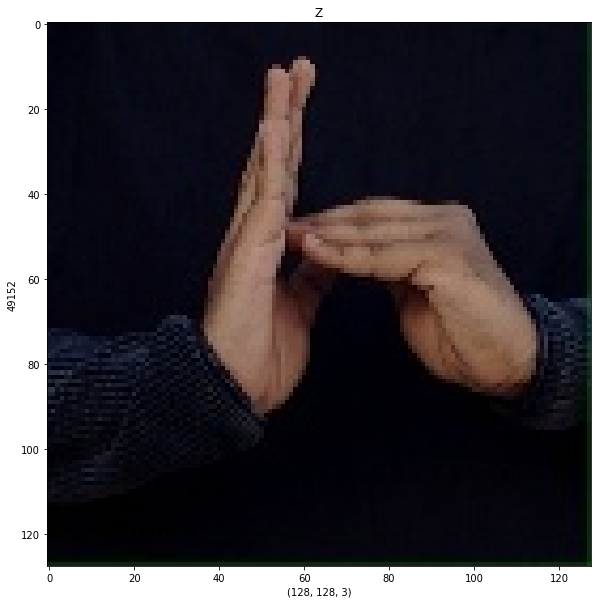

In [17]:
figure = plt.figure(figsize=(10,10))

Image_Sign = simple_vision(Main_Sign_Data["JPG"][33])

plt.xlabel(Image_Sign.shape)
plt.ylabel(Image_Sign.size)
plt.title(Main_Sign_Data["CATEGORY"][33])
plt.imshow(Image_Sign)

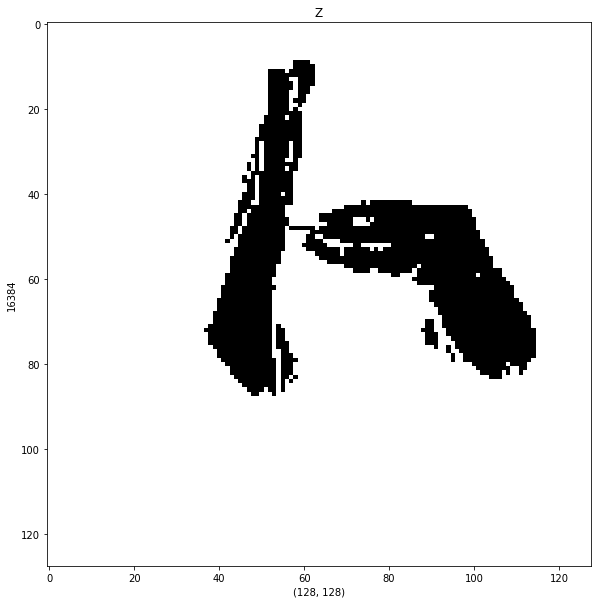

In [18]:
figure = plt.figure(figsize=(10,10))

Image_Sign = threshold_vision(Main_Sign_Data["JPG"][33])

plt.xlabel(Image_Sign.shape)
plt.ylabel(Image_Sign.size)
plt.title(Main_Sign_Data["CATEGORY"][33])
plt.imshow(Image_Sign,cmap="gray")

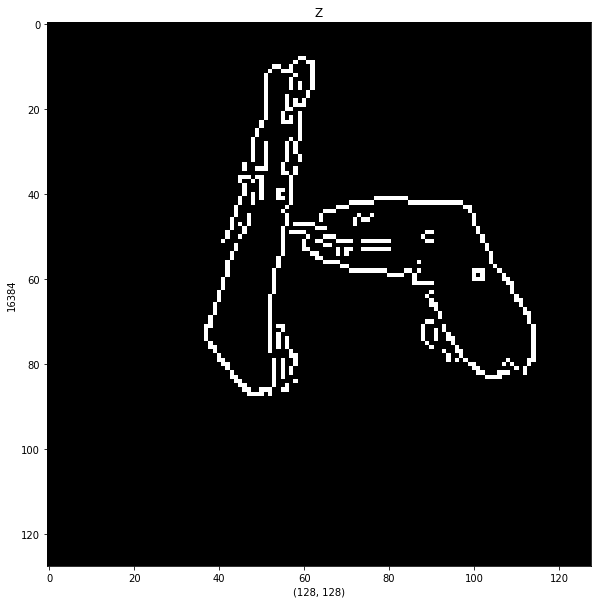

In [19]:
figure = plt.figure(figsize=(10,10))

Image_Sign = canny_vision(Main_Sign_Data["JPG"][33])

plt.xlabel(Image_Sign.shape)
plt.ylabel(Image_Sign.size)
plt.title(Main_Sign_Data["CATEGORY"][33])
plt.imshow(Image_Sign,cmap="gray")

##### Example 2

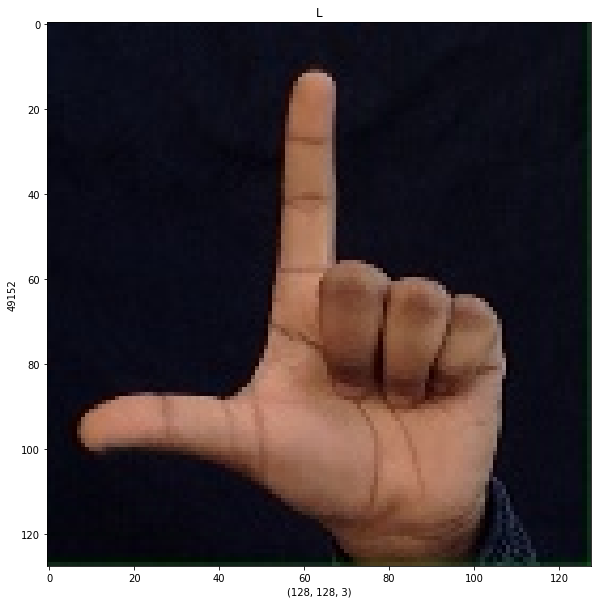

In [20]:
figure = plt.figure(figsize=(10,10))

Image_Sign = simple_vision(Main_Sign_Data["JPG"][41113])

plt.xlabel(Image_Sign.shape)
plt.ylabel(Image_Sign.size)
plt.title(Main_Sign_Data["CATEGORY"][41113])
plt.imshow(Image_Sign)

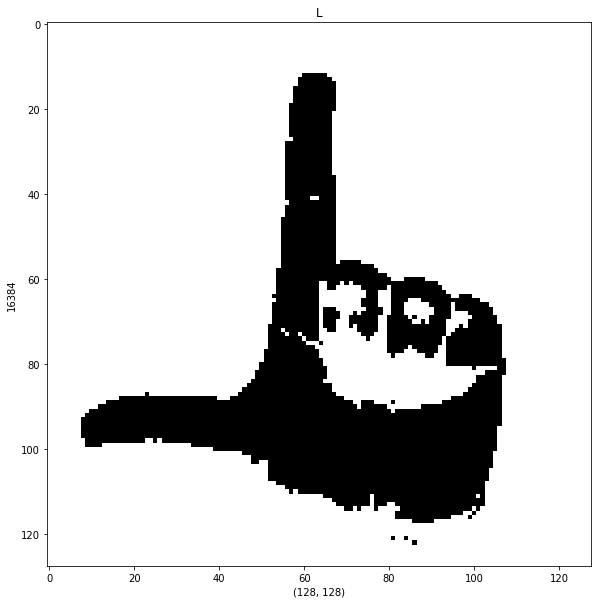

In [21]:
figure = plt.figure(figsize=(10,10))

Image_Sign = threshold_vision(Main_Sign_Data["JPG"][41113])

plt.xlabel(Image_Sign.shape)
plt.ylabel(Image_Sign.size)
plt.title(Main_Sign_Data["CATEGORY"][41113])
plt.imshow(Image_Sign,cmap="gray")

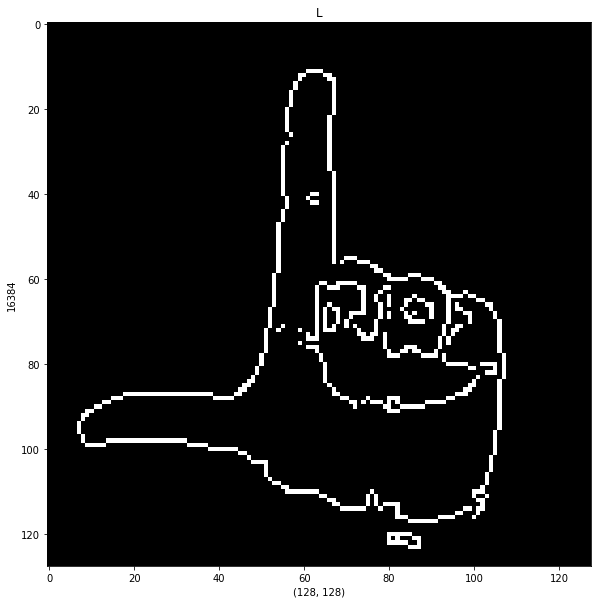

In [22]:
figure = plt.figure(figsize=(10,10))

Image_Sign = canny_vision(Main_Sign_Data["JPG"][41113])

plt.xlabel(Image_Sign.shape)
plt.ylabel(Image_Sign.size)
plt.title(Main_Sign_Data["CATEGORY"][41113])
plt.imshow(Image_Sign,cmap="gray")

# SPLITTING THE DATASET

In [23]:
X_Train,X_Test = train_test_split(Main_Sign_Data,train_size=0.9,random_state=123,shuffle=True)

In [24]:
print(X_Train.shape)
print(X_Test.shape)

(38470, 2)
(4275, 2)


In [25]:
print(type(X_Train))
print(type(X_Test))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


# IMAGE DATA GENERATOR PROCESS

#### Generator Function

In [26]:
Train_IMG_Generator = ImageDataGenerator(rescale=1./255,
                                        zoom_range=0.5,
                                        shear_range=0.5,
                                        brightness_range=[0.6,1.0],
                                        rotation_range=35,
                                        width_shift_range=0.1,
                                        height_shift_range=0.1,
                                        vertical_flip=True,
                                         featurewise_std_normalization=False,
                                         samplewise_center=False,
                                         samplewise_std_normalization=False,
                                        fill_mode="nearest",
                                        validation_split=0.1)

In [27]:
Test_IMG_Generator = ImageDataGenerator(rescale=1./255)

#### Example

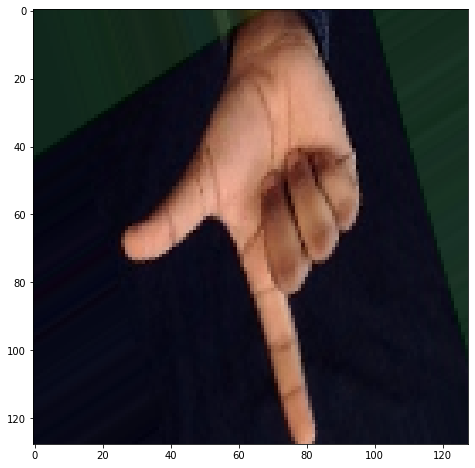

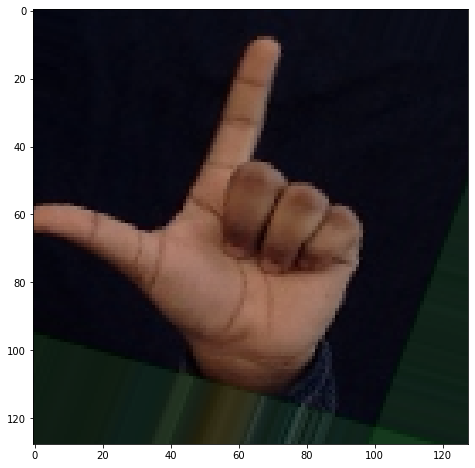

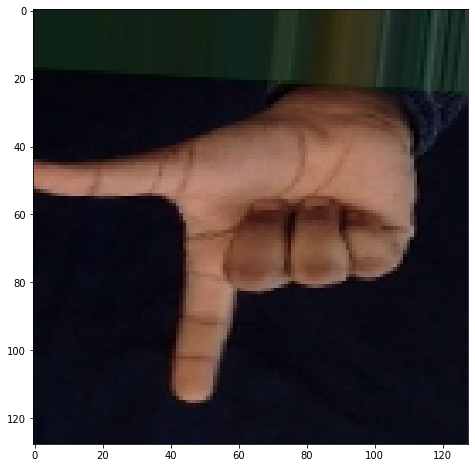

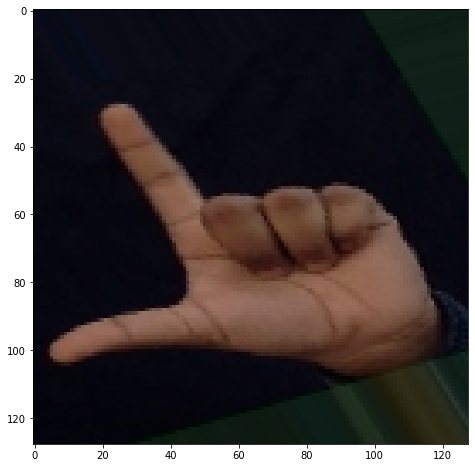

In [28]:
Example_Img = simple_vision(X_Train.JPG[3])
Example_Img = Example_Img.reshape((1,) + Example_Img.shape)

i = 0 

for batch in Train_IMG_Generator.flow(Example_Img,batch_size=32):
    
    figure = plt.figure(figsize=(8,8))
    plt.imshow(image.img_to_array(batch[0]))
    
    i += 1
    if i % 4 == 0:
        break
        
plt.show()

#### Generating

In [29]:
Train_Set = Train_IMG_Generator.flow_from_dataframe(dataframe=X_Train,
                                                   x_col="JPG",
                                                   y_col="CATEGORY",
                                                   batch_size=32,
                                                   class_mode="categorical",
                                                   color_mode="grayscale",
                                                   subset="training")

Found 34623 validated image filenames belonging to 35 classes.


In [30]:
Validation_Set = Train_IMG_Generator.flow_from_dataframe(dataframe=X_Train,
                                                   x_col="JPG",
                                                   y_col="CATEGORY",
                                                   batch_size=32,
                                                   class_mode="categorical",
                                                   color_mode="grayscale",
                                                   subset="validation")

Found 3847 validated image filenames belonging to 35 classes.


In [31]:
Test_Set = Test_IMG_Generator.flow_from_dataframe(dataframe=X_Test,
                                                   x_col="JPG",
                                                   y_col="CATEGORY",
                                                   batch_size=32,
                                                   class_mode="categorical",
                                                   color_mode="grayscale",
                                                   shuffle=False)

Found 4275 validated image filenames belonging to 35 classes.


In [32]:
print("TRAIN: ")
print(Train_Set.class_indices)
print(Train_Set.classes[0:5])
print(Train_Set.image_shape)
print("---"*20)
print("VALIDATION: ")
print(Validation_Set.class_indices)
print(Validation_Set.classes[0:5])
print(Validation_Set.image_shape)
print("---"*20)
print("TEST: ")
print(Test_Set.class_indices)
print(Test_Set.classes[0:5])
print(Test_Set.image_shape)

TRAIN: 
{'1': 0, '2': 1, '3': 2, '4': 3, '5': 4, '6': 5, '7': 6, '8': 7, '9': 8, 'A': 9, 'B': 10, 'C': 11, 'D': 12, 'E': 13, 'F': 14, 'G': 15, 'H': 16, 'I': 17, 'J': 18, 'K': 19, 'L': 20, 'M': 21, 'N': 22, 'O': 23, 'P': 24, 'Q': 25, 'R': 26, 'S': 27, 'T': 28, 'U': 29, 'V': 30, 'W': 31, 'X': 32, 'Y': 33, 'Z': 34}
[14, 25, 8, 7, 23]
(256, 256, 1)
------------------------------------------------------------
VALIDATION: 
{'1': 0, '2': 1, '3': 2, '4': 3, '5': 4, '6': 5, '7': 6, '8': 7, '9': 8, 'A': 9, 'B': 10, 'C': 11, 'D': 12, 'E': 13, 'F': 14, 'G': 15, 'H': 16, 'I': 17, 'J': 18, 'K': 19, 'L': 20, 'M': 21, 'N': 22, 'O': 23, 'P': 24, 'Q': 25, 'R': 26, 'S': 27, 'T': 28, 'U': 29, 'V': 30, 'W': 31, 'X': 32, 'Y': 33, 'Z': 34}
[25, 20, 25, 21, 32]
(256, 256, 1)
------------------------------------------------------------
TEST: 
{'1': 0, '2': 1, '3': 2, '4': 3, '5': 4, '6': 5, '7': 6, '8': 7, '9': 8, 'A': 9, 'B': 10, 'C': 11, 'D': 12, 'E': 13, 'F': 14, 'G': 15, 'H': 16, 'I': 17, 'J': 18, 'K': 19,

# CNN MODEL

#### Parameters

In [33]:
COMPILE_OPTIMIZER = "adam"
COMPILE_LOSS = "categorical_crossentropy"
COMPILE_METRICS = ["accuracy"]
INPUT_DIM = (256,256,1)
OUTPUT_DIM = 35

In [34]:
Early_Stopper = tf.keras.callbacks.EarlyStopping(monitor="loss",patience=3,mode="min")
Checkpoint_Model = tf.keras.callbacks.ModelCheckpoint(monitor="val_accuracy",
                                                      save_best_only=True,
                                                      save_weights_only=True,
                                                      filepath="./modelcheck")

#### Model Design

In [35]:
Model = Sequential()

Model.add(Conv2D(24,(3,3),activation="relu",input_shape=INPUT_DIM))
Model.add(BatchNormalization())
Model.add(MaxPooling2D((2,2),strides=2))

Model.add(Conv2D(64,(3,3),activation="relu",padding="same"))
Model.add(Dropout(0.3))
Model.add(MaxPooling2D((2,2),strides=2))

Model.add(Conv2D(64,(3,3),activation="relu",padding="same"))
Model.add(Dropout(0.3))
Model.add(MaxPooling2D((2,2),strides=2))

Model.add(Conv2D(128,(3,3),activation="relu",padding="same"))
Model.add(Conv2D(128,(3,3),activation="relu",padding="same"))
Model.add(Dropout(0.3))
Model.add(MaxPooling2D((2,2),strides=2))

Model.add(Conv2D(256,(3,3),activation="relu",padding="same"))
Model.add(Dropout(0.3))
Model.add(MaxPooling2D((2,2),strides=2))

Model.add(Flatten())
Model.add(Dense(2352,activation="relu"))
Model.add(Dropout(0.5))
Model.add(Dense(OUTPUT_DIM,activation="softmax"))

2021-12-08 03:45:06.598592: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-08 03:45:06.600235: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-08 03:45:06.601292: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-08 03:45:06.602430: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [36]:
Model.compile(optimizer=COMPILE_OPTIMIZER,loss=COMPILE_LOSS,metrics=COMPILE_METRICS)
Model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 24)      240       
_________________________________________________________________
batch_normalization (BatchNo (None, 254, 254, 24)      96        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 24)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 127, 127, 64)      13888     
_________________________________________________________________
dropout (Dropout)            (None, 127, 127, 64)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 63, 63, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 63, 63, 64)        3

#### Training the Model

In [37]:
CNN_Model = Model.fit(Train_Set,
                      validation_data=Validation_Set,
                      callbacks=[Early_Stopper,Checkpoint_Model],
                      epochs=6)

2021-12-08 03:45:10.862046: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/6


2021-12-08 03:45:13.171490: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


1082/1082 [==============================] - 495s 450ms/step - loss: 0.8811 - accuracy: 0.7377 - val_loss: 0.6303 - val_accuracy: 0.9101
Epoch 2/6
1082/1082 [==============================] - 279s 258ms/step - loss: 0.1882 - accuracy: 0.9412 - val_loss: 0.5327 - val_accuracy: 0.9270
Epoch 3/6
1082/1082 [==============================] - 279s 258ms/step - loss: 0.1273 - accuracy: 0.9595 - val_loss: 0.2293 - val_accuracy: 0.9615
Epoch 4/6
1082/1082 [==============================] - 282s 260ms/step - loss: 0.0973 - accuracy: 0.9705 - val_loss: 0.3700 - val_accuracy: 0.9181
Epoch 5/6
1082/1082 [==============================] - 288s 266ms/step - loss: 0.0817 - accuracy: 0.9758 - val_loss: 0.3320 - val_accuracy: 0.9267
Epoch 6/6
1082/1082 [==============================] - 289s 267ms/step - loss: 0.0799 - accuracy: 0.9751 - val_loss: 0.3082 - val_accuracy: 0.9392


#### Saving the trained Model

In [38]:
Model.save("ISL_Prediction_Model.h5")

#### Insights into the Training of the Model

<AxesSubplot:>

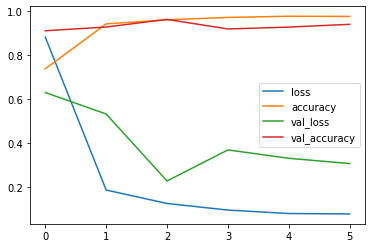

In [39]:
Grap_Data = pd.DataFrame(CNN_Model.history)
Grap_Data.plot()

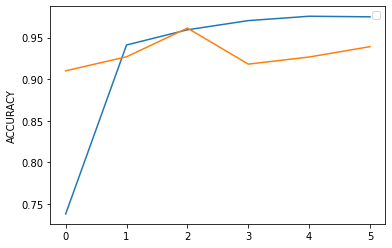

In [40]:
plt.plot(CNN_Model.history["accuracy"])
plt.plot(CNN_Model.history["val_accuracy"])
plt.ylabel("ACCURACY")
plt.legend()
plt.show()

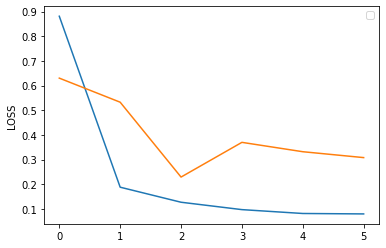

In [41]:
plt.plot(CNN_Model.history["loss"])
plt.plot(CNN_Model.history["val_loss"])
plt.ylabel("LOSS")
plt.legend()
plt.show()

## Results

#### Accuracy for the Test Dataset

In [42]:
Model_Results = Model.evaluate(Test_Set)
print("LOSS:  " + "%.4f" % Model_Results[0])
print("ACCURACY:  " + "%.2f" % Model_Results[1])

134/134 [==============================] - 32s 244ms/step - loss: 0.2493 - accuracy: 0.9354
LOSS:  0.2493
ACCURACY:  0.94


#### Prediction on the Test Datatset

In [43]:
Model_Test_Prediction = Model.predict(Test_Set)
Model_Test_Prediction = Model_Test_Prediction.argmax(axis=-1)

In [44]:
#loaded_model = tf.keras.models.load_model('..input/ISL_Prediction_Model.h5')

In [45]:
final = []
for i in Model_Test_Prediction:
    final.append(temp[i])

Model_Test_Prediction = final
final = np.nan
temp = np.nan

#### Predictions

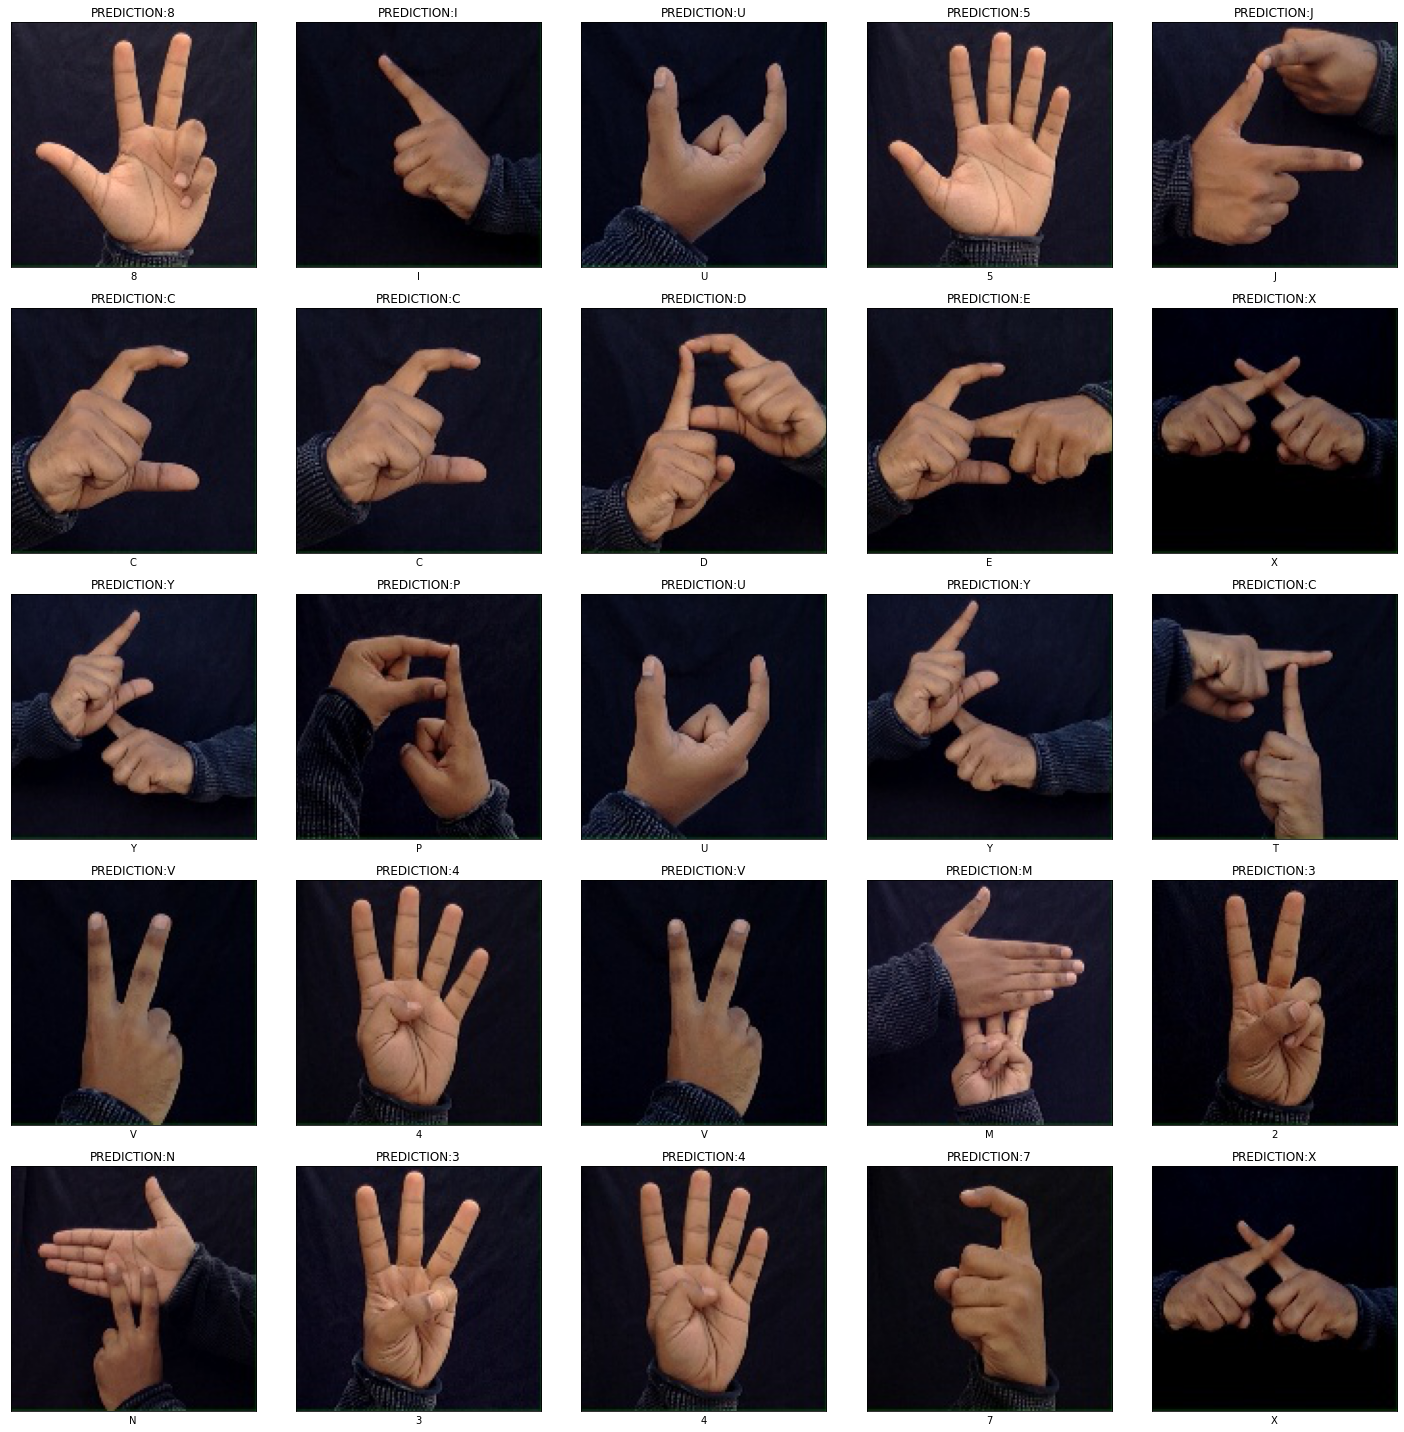

In [46]:
fig, axes = plt.subplots(nrows=5,
                         ncols=5,
                         figsize=(20, 20),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(X_Test["JPG"].iloc[i]))
    ax.set_title(f"PREDICTION:{Model_Test_Prediction[i]}")
    ax.set_xlabel(X_Test["CATEGORY"].iloc[i])
plt.tight_layout()
plt.show()